# Outliner Detection

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("Datasets/CMO_MSP_Mandi.csv")
df.head(5)

commodity  year          Type  msprice  msp_filter
0   PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1  RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2     Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3    SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4            BAJRI  2012  Kharif Crops   1175.0           1

In [30]:
def find_outliners(df):
    types = list(df["Types"].unique())
    for typ in types:
        temp_data =  df[df["Types"]==typ]
        actual_data = len(temp_data)
        quant1 = temp_data["msprice"].quantile(0.25)
        quant2 = temp_data["msprice"].quantile(0.75)
        inter_quantile_range = quant2-quant1
        lower_threshold = quant1-1.5*inter_quantile_range # basically lower threshold is the lower input value.
        upper_threshold = quant3+1.5*inter_quantile_range
        filter_data  = temp_data[(temp_data["msprice"]>lower_threshold)&(temp_data["msprice"]<upper_threshold)]
        flitered = len(filter_data)
        if actual_data != flitered:
            print(typ)
        else:
            print("No outliners found in ",typ)

In [31]:
def plot_outliners(df):
    commodities=list(df["Commodity"].unique())
    flag=0
    for commodity in commodities:
        temp_data=df[df["Commodity"]==commodity] 
        actual=len(temp_data)
        if actual>1 :
            quant1 = temp_data["modal_price"].quantile(0.25)
            quant3 = temp_data["modal_price"].quantile(0.75)
            inter_quantile_range = quant3-quant1 
            lower_threshold  = q1-1.5*inter_quantile_range
            upper_threshold = q3+1.5*inter_quantile_range
            data_filter=temp_data[(temp_data["modal_price"] > lower_threshold) & (temp_data["modal_price"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="Commodity", y="modal_price",data=data_filter) 
                sns.stripplot(x="Commodity", y="modal_price",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') 
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No modal price outliers found",df["Type"].iloc[0] )

In [32]:
def remove_outlier(df): 
    main_data=pd.DataFrame()
    commodities=list(df["commodity"].unique())
    for commodity in commodities:
        temp_data=df[df["commodity"]==commodity]
        actual=len(temp_data)
        if actual>1:
            quant1 = temp_data["msprice"].quantile(0.25)
            quant2 = temp_data["msprice"].quantile(0.75)
            inter_quantile_range = quant2-quant1 
            lower_threshold  = quant1-1.5*inter_quantile_range
            upper_threshold = quant2+1.5*inter_quantile_range
            data_temp = data_temp.loc[(data_temp['msprice'] > lower_threshold) & (data_temp['msprice'] < upper_threshold)]
            data_temp.sort_values("year",inplace=True)
            
        main_data=pd.concat([main_data,temp_data])
        main_data.reset_index(drop=True,inplace=True)
    return main_data

In [33]:
df=pd.read_csv("Datasets/CMO_MSP_Mandi.csv")
df=df.dropna(subset=['msprice'])

In [34]:
df.head(20)

commodity  year          Type  msprice  msp_filter
0       PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1      RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2         Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3        SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4                BAJRI  2012  Kharif Crops   1175.0           1
5                MAIZE  2012  Kharif Crops   1175.0           1
6        Ragi_Maldandi  2012  Kharif Crops   1500.0           1
7     PIGEON PEA (TUR)  2012  Kharif Crops   3850.0           1
8     SPILT GERRN GRAM  2012  Kharif Crops   4400.0           1
9     SPLIT BLACK GRAM  2012  Kharif Crops   4300.0           1
10              COTTON  2012  Kharif Crops   3600.0           1
11  Cotton_Long Staple  2012  Kharif Crops   3900.0           1
12      GR.NUT KERNELS  2012  Kharif Crops   3700.0           1
13           SUNFLOWER  2012  Kharif Crops   3700.0           1
14      Soyabean_Black  2012  Kharif Crops   2200.0           1
15            SOYABEAN  2012  Kharif Crops   2240.0           1
16             SESAMUM  2012  Kharif Crops   4200.0           1
17          NIGER-SEED  2012  Kharif Crops   3500.0           1
18       WHEAT(HUSKED)  2012    Rabi Crops   1350.0           1
19     WHEAT(UNHUSKED)  2012    Rabi Crops   1350.0           1

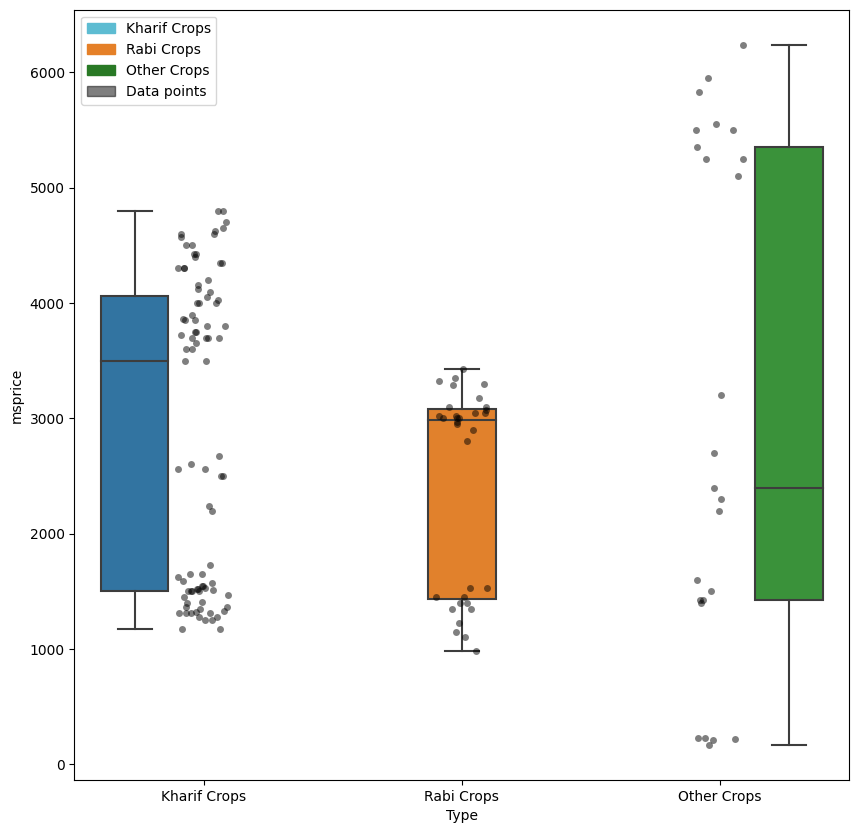

In [35]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=df) #box plot
sns.stripplot(y='msprice', x='Type',data=df,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

In [36]:
def remove_outlier(df): 
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            quant1 = data_temp["modal_price"].quantile(0.25)
            quant3 = data_temp["modal_price"].quantile(0.75)
            inter_quantile_range = quant3-quant1 
            lower_threshold  = quant1-1.5*inter_quantile_range
            upper_threshold = quant3+1.5*inter_quantile_range
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("date",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [37]:
def plot_price_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["Commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity] 
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["modal_price"].quantile(0.25)
            q2 = data_temp["modal_price"].quantile(0.75)
            iqr = q2-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q2+1.5*iqr
            data_filter=data_temp[(data_temp["modal_price"] > lower_threshold) & (data_temp["modal_price"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="Commodity", y="modal_price",data=data_filter) 
                sns.stripplot(x="Commodity", y="modal_price",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') 
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No modal price outliers found" )

In [38]:
df=pd.read_csv("Datasets/Monthly_data_cmo.csv")
df["Commodity"]=df["Commodity"].apply( lambda x : x.lower())
df=df[df["modal_price"]!=0]
df["date"]=pd.to_datetime(df["date"])

In [39]:
df.shape

(62225, 11)

In [40]:
apmc = input('Enter APMC: ')
comm = input('Enter Commodity within that APMC: ')

df_temp = df[df['APMC'] == apmc]
df_temp = df_temp[df['Commodity'] == comm]

plot_price_outliers(df_temp)

Enter APMC: Ahmednagar
Enter Commodity within that APMC: Wheat(Husked)
No modal price outliers found


C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\2032812847.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[df['Commodity'] == comm]


In [41]:
df_filtered=pd.DataFrame()
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.shape

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp["modal_price"]=filtered_values
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp.sort_values("date",inplace=True)
C:\Users\Tanishq\AppData\Local\Temp\ipykernel_8404\744061644.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

(62225, 11)

In [42]:
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("Datasets/Monthly_data_cmo_filtered.csv",index=False)

# Seasonality Detection(Pre-Processing)

In [76]:
import pandas as pd
pd.set_option('chained_assignment',None)
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [81]:
def check_seasonality_type(data_filter, deseasonalize = False):
    data_filter['Period'] = data_filter["Year"].astype(str) + data_filter["Month"]
    data_filter['Period'] = pd.to_datetime(data_filter['Period'], format="%Y%B")

    ts_df = pd.DataFrame(data=data_filter['modal_price'].values, index=data_filter['Period'], columns=['modal_price'])
    ts_df.index = pd.to_datetime(ts_df.index)
    
    ts_df = ts_df.resample('MS').mean()
    ts_df = ts_df.fillna(int(ts_df['modal_price'].mean()))
    
    
    
   
    # Decomposing data 
    resultadd = seasonal_decompose(ts_df, model='additive',period=12)
    resultmult = seasonal_decompose(ts_df, model='multiplicative',period=12)
        
    try:
        additive_acf=sum(np.asarray(acf(resultadd.resid, missing='drop'))*2)
        multiplicative_acf=sum(np.asarray(acf(resultmult.resid, missing='drop'))*2)
        
    except:
        resultadd = seasonal_decompose(ts_df, model='additive',period=6)
        resultmult = seasonal_decompose(ts_df, model='multiplicative',period=6)
    
        
        additive_acf=sum(np.asarray(acf(resultadd.resid, missing='drop'))*2)
        multiplicative_acf=sum(np.asarray(acf(resultmult.resid, missing='drop'))*2)
    

    if additive_acf<multiplicative_acf:
        value = "Additive" 
        if deseasonalize:
            
            ts_df['Seasonal'] = resultadd.seasonal.values
            
            
            values=ts_df["modal_price"]-ts_df['Seasonal']
            values=values.tolist()
            
            indexes=data_filter.index.tolist()
            values_range=range(0,len(values))
            for index,value in zip(indexes,values_range):
                data_filter.at[index,"deseasonalise_price"]=values[value]
            
            return data_filter[["APMC","Commodity","combination_label","date","modal_price","quarter","deseasonalise_price"]]
            
        else:
            return "Additive"
        
    else:
        value = "Multiplicative" 
        if deseasonalize:
            
            ts_df['Seasonal'] = resultmult.seasonal.values
            
            
            values=ts_df["modal_price"]/ts_df['Seasonal']
            values=values.tolist()
            
            indexes=data_filter.index.tolist()
            values_range=range(0,len(values))
            for index,value in zip(indexes,values_range):
                data_filter.at[index,"deseasonalise_price"]=values[value]
            
            return data_filter[["APMC","Commodity","combination_label","date","modal_price","quarter","deseasonalise_price"]]
        
        else:
            return "Multiplicative"
 

In [82]:
df = pd.read_csv("Datasets/seasonal_data_analysis.csv")
df["date"]=pd.to_datetime(df["date"])

In [83]:
df.shape

(25027, 13)

In [84]:
commodities=list(df["combination_label"].unique())
seasonality_type=[]


for commodity in commodities:
    data_filter=df[df["combination_label"]==commodity]
    seasonality_type.append((commodity,check_seasonality_type(data_filter)))

ValueError: x must have 2 complete cycles requires 24 observations. x only has 23 observation(s)

In [85]:
dataframe=pd.DataFrame(seasonality_type,columns=["Commodity","Seasonality Type"])
dataframe.to_csv("seasonality_type.csv",index=False)

In [86]:
dataframe[375:425]


Empty DataFrame
Columns: [Commodity, Seasonality Type]
Index: []

In [91]:


df_type=pd.read_csv("seasonality_type.csv").set_index("Commodity").to_dict()["Seasonality Type"]
df_data=pd.read_csv("Datasets\seasonal_data_analysis.csv")


df_data["deseasonalise_price"]=np.nan 

In [92]:
commoditites=list(df_type.keys())
data_main=pd.DataFrame() 


for commodity in commoditites:
    data_temp=check_seasonality_type(df_data[df_data["combination_label"]==commodity],deseasonalize = True)
    data_main=pd.concat([data_main,data_temp])

    